In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [2]:
excel_data = pd.read_excel('.\Dataset\Grade-I\GRADE-I(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,MANGALURU,2020-01-01,GRADE-I,AVERAGE,1000,Numbers,16000,30000,24000,Dakshina Kannada
1,MANGALURU,2020-01-02,GRADE-I,AVERAGE,750,Numbers,16000,28000,25000,Dakshina Kannada
2,MANGALURU,2020-01-04,GRADE-I,AVERAGE,500,Numbers,16000,28000,22000,Dakshina Kannada
3,MANGALURU,2020-01-13,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada
4,MANGALURU,2020-01-14,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada


In [3]:
df.isna().sum()

Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1467 non-null   object
 1   Date      1467 non-null   object
 2   Variety   1467 non-null   object
 3   Grade     1467 non-null   object
 4   Arrivals  1467 non-null   int64 
 5   Unit      1467 non-null   object
 6   Min       1467 non-null   int64 
 7   Max       1467 non-null   int64 
 8   Modal     1467 non-null   int64 
 9   District  1467 non-null   object
dtypes: int64(4), object(6)
memory usage: 114.7+ KB


In [5]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1467 non-null   object        
 1   Date      1467 non-null   datetime64[ns]
 2   Variety   1467 non-null   object        
 3   Grade     1467 non-null   object        
 4   Arrivals  1467 non-null   int64         
 5   Unit      1467 non-null   object        
 6   Min       1467 non-null   int64         
 7   Max       1467 non-null   int64         
 8   Modal     1467 non-null   int64         
 9   District  1467 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 114.7+ KB


In [7]:
df_test.sort_values(by='Date',inplace=True)

In [8]:
df_test = df[['Date','Min','Max','Modal']]
df_test

,Date,Min,Max,Modal
99,2015-01-01,12500,22500,18500
100,2015-01-02,12500,22500,18500
101,2015-01-03,12500,22500,18500
102,2015-01-05,12000,23500,19000
103,2015-01-06,12000,23500,19000
...,...,...,...,...
94,2021-06-01,27000,33000,29000
95,2021-07-01,27000,33000,29000
96,2021-11-23,2000,2700,2500
97,2022-08-18,14000,18000,16000


In [9]:
#df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

In [10]:
excel_data1 = pd.read_excel('./Dataset/Grade-I/grade-I_test.xlsx')
df_1 = pd.DataFrame(excel_data1)

In [11]:
df_test = df_1

In [12]:
df_test.index = df_test['Date']
df_test

,Date,Min,Max,Modal
Date,,,,
2015-01-01,2015-01-01,12500,22500,18500
2015-01-02,2015-01-02,12500,22500,18500
2015-01-03,2015-01-03,12500,22500,18500
2015-01-05,2015-01-05,12000,23500,19000
2015-01-06,2015-01-06,12000,23500,19000
...,...,...,...,...
2020-12-24,2020-12-24,27000,33000,29000
2020-12-28,2020-12-28,27000,33000,29000
2020-12-29,2020-12-29,27000,33000,29000


In [13]:
df_test = df_test.drop('Date',axis=1)


In [14]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,12500,22500,18500
2015-01-02,12500,22500,18500
2015-01-03,12500,22500,18500
2015-01-05,12000,23500,19000
2015-01-06,12000,23500,19000
...,...,...,...
2020-12-24,27000,33000,29000
2020-12-28,27000,33000,29000
2020-12-29,27000,33000,29000


In [15]:
df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

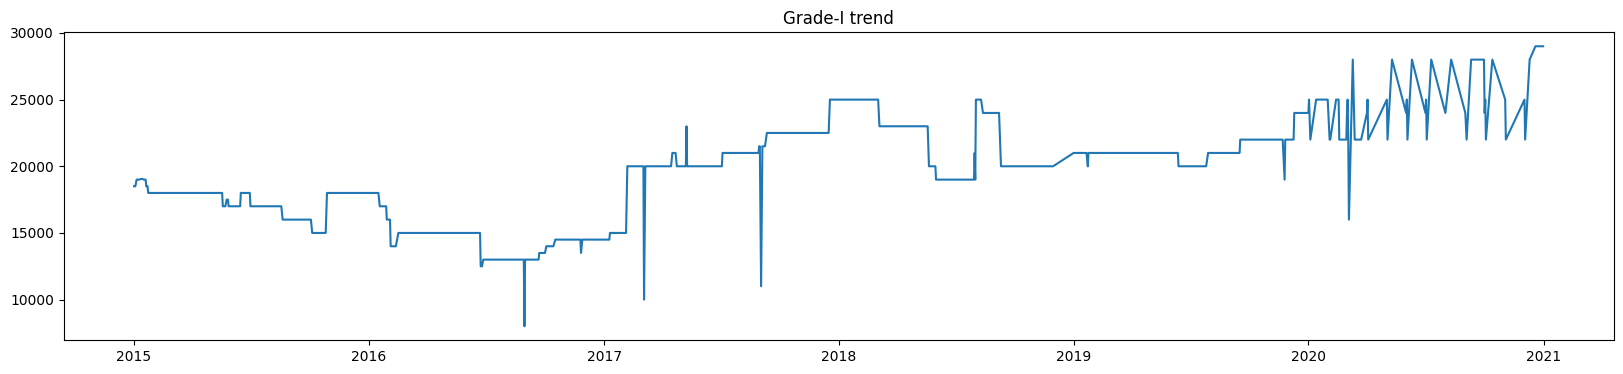

In [16]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Grade-I trend')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler 

scaler_gradeI = MinMaxScaler(feature_range=(0,1))

In [18]:
df_gradeI = df_test

In [19]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_gradeI[columns_to_scale] = scaler_gradeI.fit_transform(df_gradeI[columns_to_scale])

In [20]:
import joblib

joblib.dump(scaler_gradeI, './Scaler Objects/scaler_grade-I.pkl')

['./Scaler Objects/scaler_grade-I.pkl']

In [21]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,0.431373,0.543478,0.50000
2015-01-02,0.431373,0.543478,0.50000
2015-01-03,0.431373,0.543478,0.50000
2015-01-05,0.411765,0.586957,0.52381
2015-01-06,0.411765,0.586957,0.52381
...,...,...,...
2020-12-24,1.000000,1.000000,1.00000
2020-12-28,1.000000,1.000000,1.00000
2020-12-29,1.000000,1.000000,1.00000


In [22]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2]   
        y.append(label)
    return np.array(X), np.array(y)

In [23]:
WINDOW_SIZE = 3 
X_gradeI, y_gradeI= df_to_X_y(df_gradeI,WINDOW_SIZE)
X_gradeI.shape, y_gradeI.shape

((1453, 3, 3), (1453, 3))

In [24]:
X_train_gradeI, y_train_gradeI = X_gradeI[:1300], y_gradeI[:1300]
X_val_gradeI, y_val_gradeI = X_gradeI[1300:1400], y_gradeI[1300:1400]
X_test_gradeI, y_test_gradeI = X_gradeI[1400:] ,y_gradeI[1400:] 

X_train_gradeI.shape, y_train_gradeI.shape, X_val_gradeI.shape, y_val_gradeI.shape, X_test_gradeI.shape, y_test_gradeI.shape

((1300, 3, 3), (1300, 3), (100, 3, 3), (100, 3), (53, 3, 3), (53, 3))

In [25]:
model_gradeI = Sequential()
model_gradeI.add(InputLayer((3,3))),
model_gradeI.add(LSTM(64)),
model_gradeI.add(Dense(64, 'relu')),
model_gradeI.add(Dense(30, 'relu')),
model_gradeI.add(Dense(3)),

model_gradeI.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,611 (92.23 KB)

 Trainable params: 23,611 (92.23 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model_gradeI.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

Callbacks and EarlyStopping

In [29]:


callbacks_cb = keras.callbacks.ModelCheckpoint('models/GradeI/gradeI_model.keras')
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

TensorBoard logs


In [30]:
import os
root_logdir = os.path.join('models','GradeI','gradeI_model_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [31]:
hist_gradeI = model_gradeI.fit(X_train_gradeI, y_train_gradeI, validation_data=(X_val_gradeI, y_val_gradeI), epochs=100, verbose=2, callbacks=[callbacks_cb, earlystopping_cb, tensorboard_cb])

Epoch 1/100
41/41 - 4s - 101ms/step - loss: 0.2861 - mean_absolute_error: 0.5081 - val_loss: 0.4109 - val_mean_absolute_error: 0.6301
Epoch 2/100
41/41 - 0s - 9ms/step - loss: 0.2182 - mean_absolute_error: 0.4433 - val_loss: 0.2889 - val_mean_absolute_error: 0.5299
Epoch 3/100
41/41 - 0s - 8ms/step - loss: 0.1347 - mean_absolute_error: 0.3431 - val_loss: 0.1502 - val_mean_absolute_error: 0.3809
Epoch 4/100
41/41 - 0s - 9ms/step - loss: 0.0521 - mean_absolute_error: 0.2019 - val_loss: 0.0387 - val_mean_absolute_error: 0.1857
Epoch 5/100
41/41 - 0s - 11ms/step - loss: 0.0110 - mean_absolute_error: 0.0847 - val_loss: 0.0061 - val_mean_absolute_error: 0.0643
Epoch 6/100
41/41 - 0s - 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0592 - val_loss: 0.0041 - val_mean_absolute_error: 0.0519
Epoch 7/100
41/41 - 0s - 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0565 - val_loss: 0.0040 - val_mean_absolute_error: 0.0508
Epoch 8/100
41/41 - 0s - 8ms/step - loss: 0.0046 - mean_absolute_error: 0

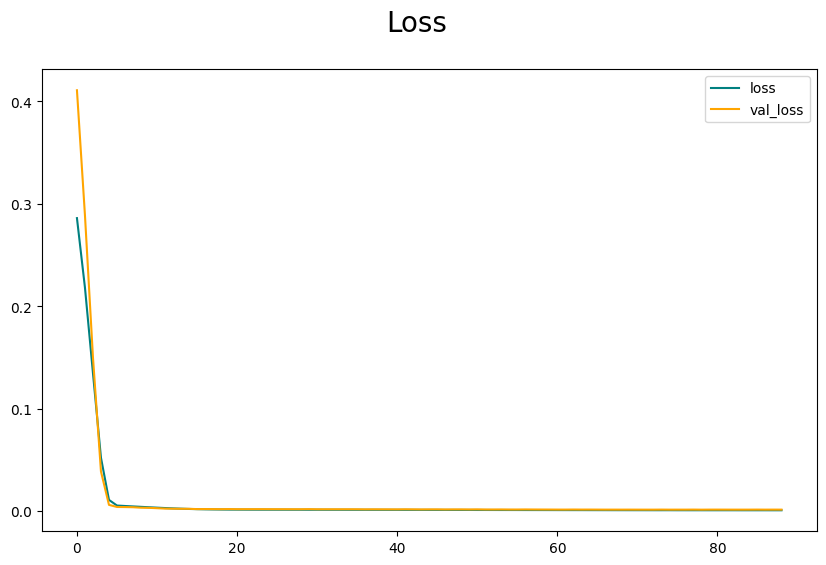

In [32]:
plt.figure(figsize=(10,6))
plt.plot(hist_gradeI.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_gradeI.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [33]:
def plot_predictions1D(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'Predictions':predictions.reshape(-1),'Actual':y})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['Predictions'][start:end],label='Predictions_modal')
    plt.plot(df['Actual'][start:end],label='Actual_modal')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    

In [34]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.012706120709740724
-------------------------------------------------------------------------------------
r2 for Train prediction is 90.44582586444166
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.458340    0.411765        0.548429    0.586957          0.501235   
1        0.453269    0.411765        0.562749    0.586957          0.509648   
2        0.449161    0.411765        0.578339    0.586957          0.518282   
3        0.445661    0.411765        0.593407    0.565217          0.526416   
4        0.446186    0.411765        0.587033    0.565217          0.526060   
5        0.446165    0.413725        0.580177    0.569565          0.525637   
6        0.446101    0.413725        0.574702    0.569565          0.525789   
7        0.446610    0.413725        0.576098    0.569565          0.526594   
8      

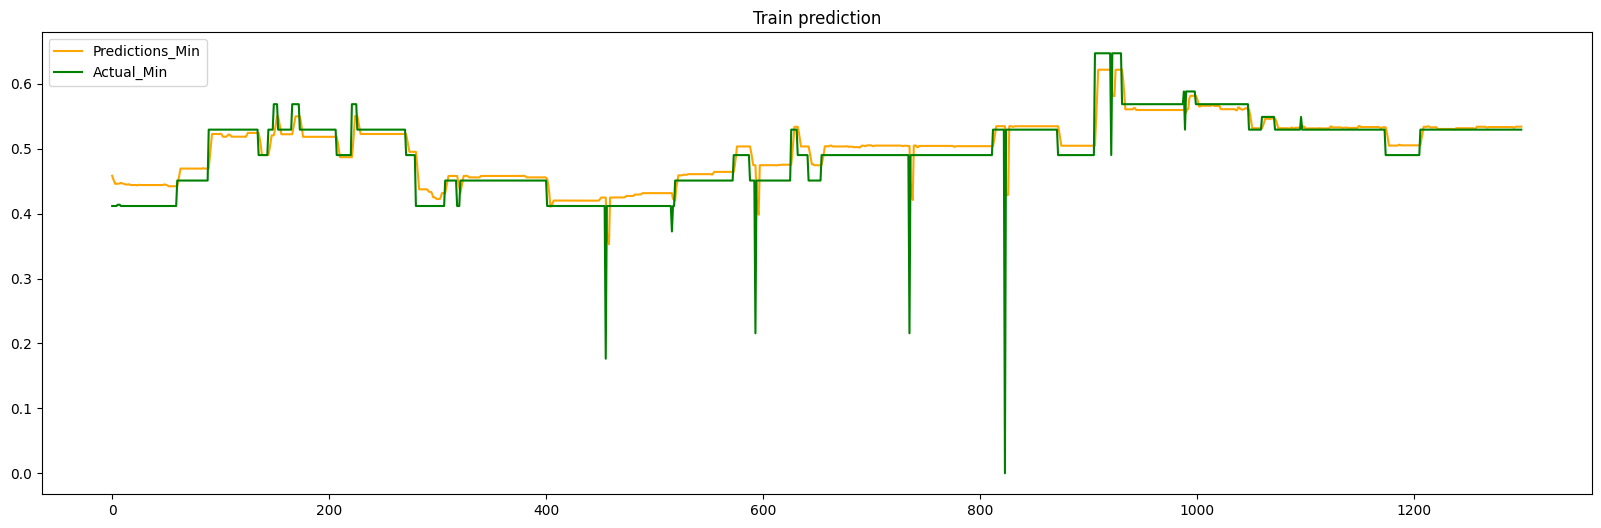

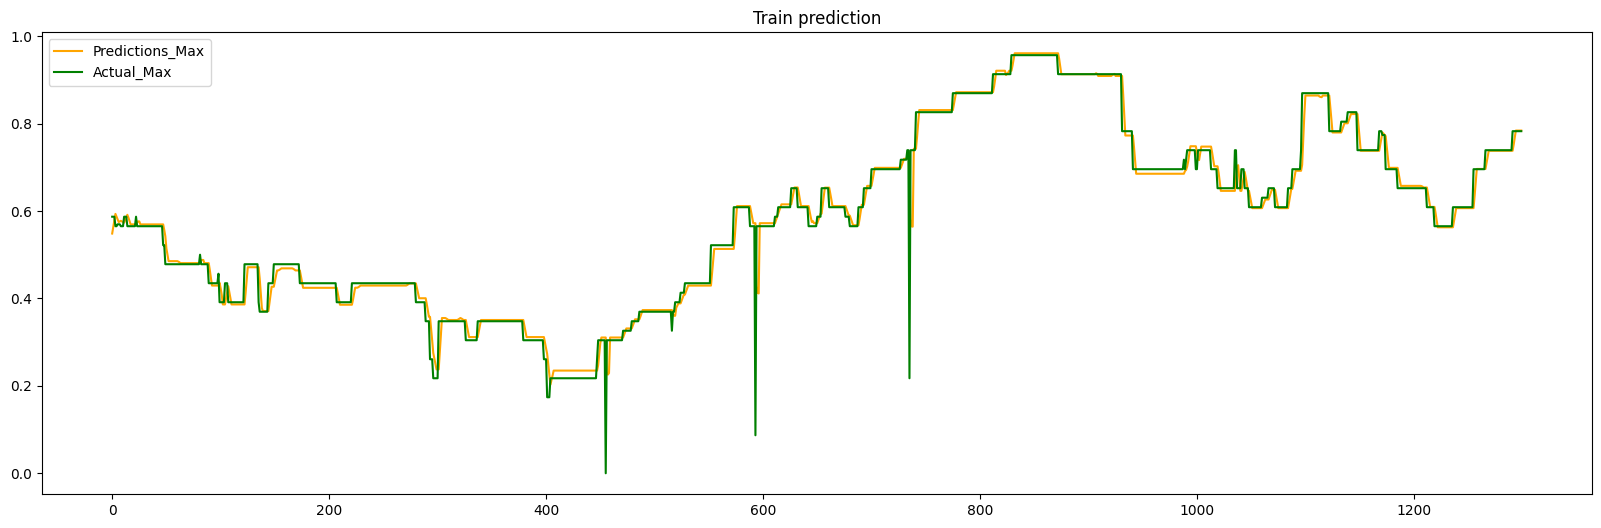

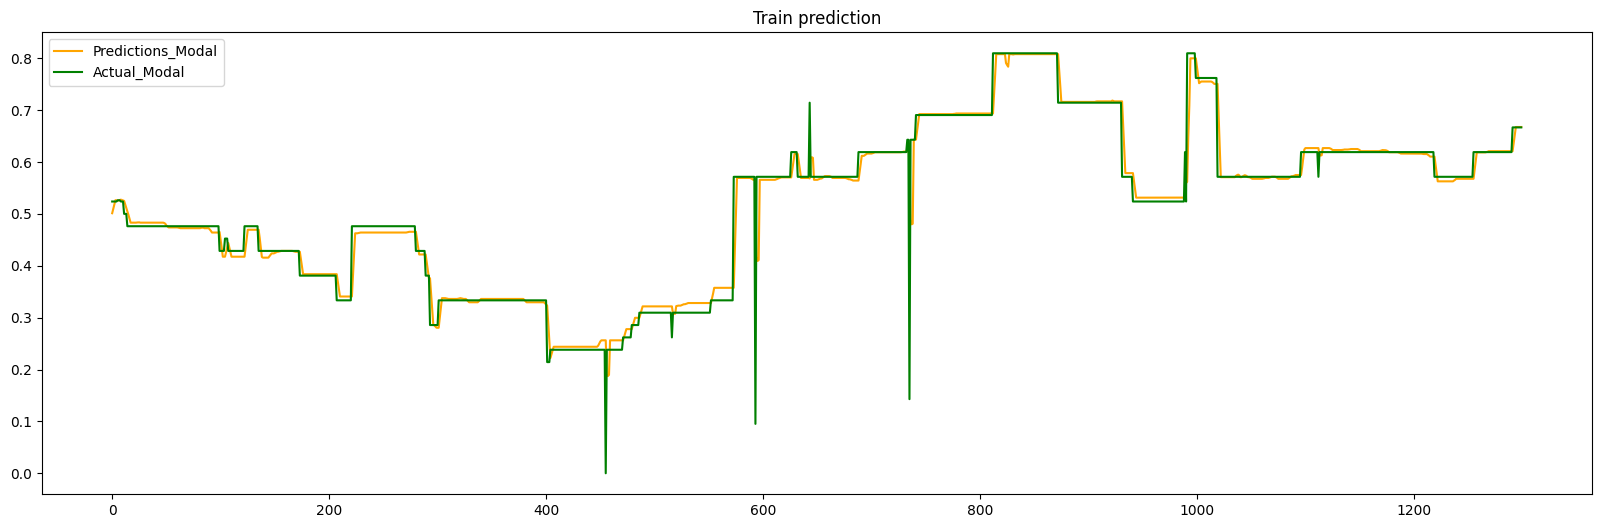

In [35]:
plot_predictions(model_gradeI, X_train_gradeI, y_train_gradeI, start=0, end=len(X_train_gradeI), tag='Train prediction')

Mean absolute error for Val prediction is 0.015728438687770702
-------------------------------------------------------------------------------------
r2 for Val prediction is 52.17665764642584
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.534006    0.529412        0.784036    0.782609          0.667434   
1        0.534006    0.529412        0.784036    0.782609          0.667434   
2        0.534006    0.529412        0.784036    0.782609          0.667434   
3        0.534006    0.529412        0.784036    0.782609          0.667434   
4        0.534006    0.529412        0.784036    0.782609          0.667434   
5        0.534006    0.529412        0.784036    0.782609          0.667434   
6        0.534006    0.529412        0.784036    0.782609          0.667434   
7        0.534006    0.529412        0.784036    0.782609          0.667434   
8        0.

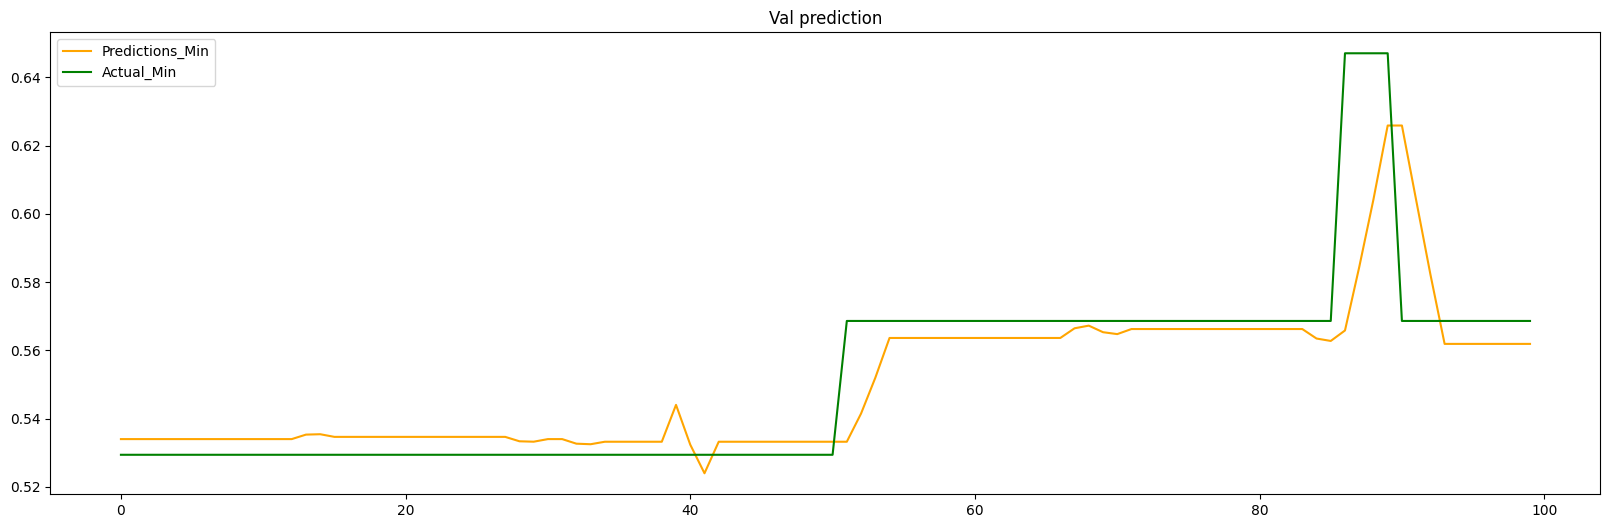

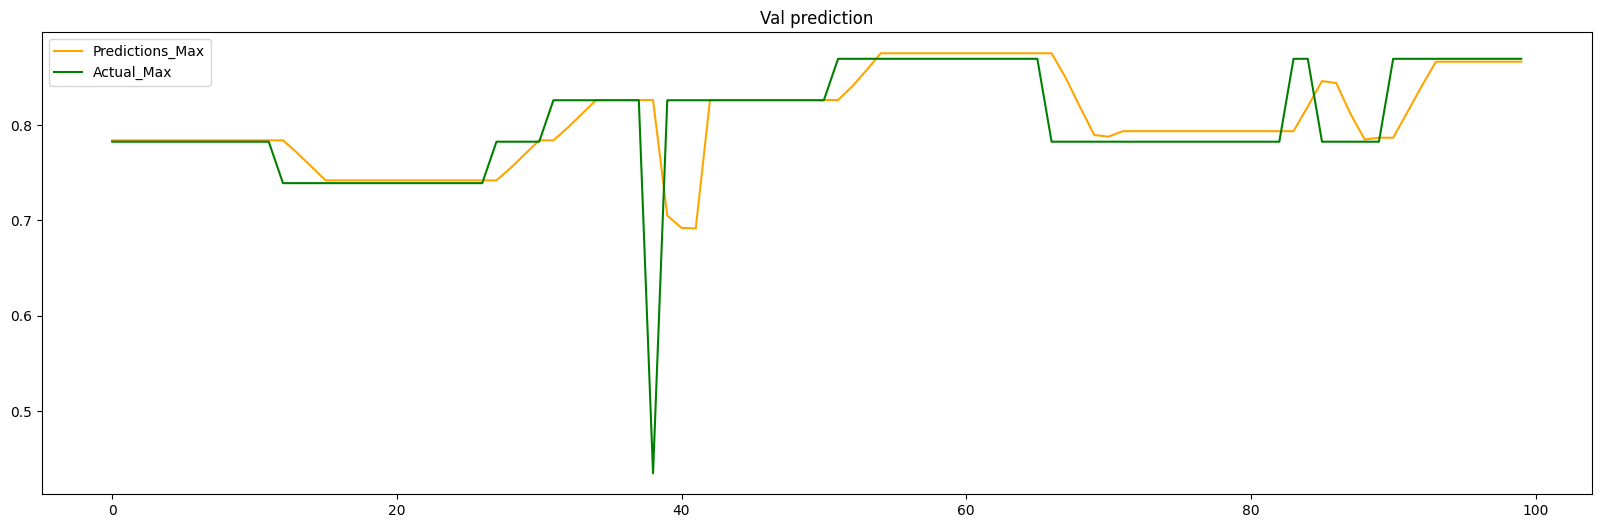

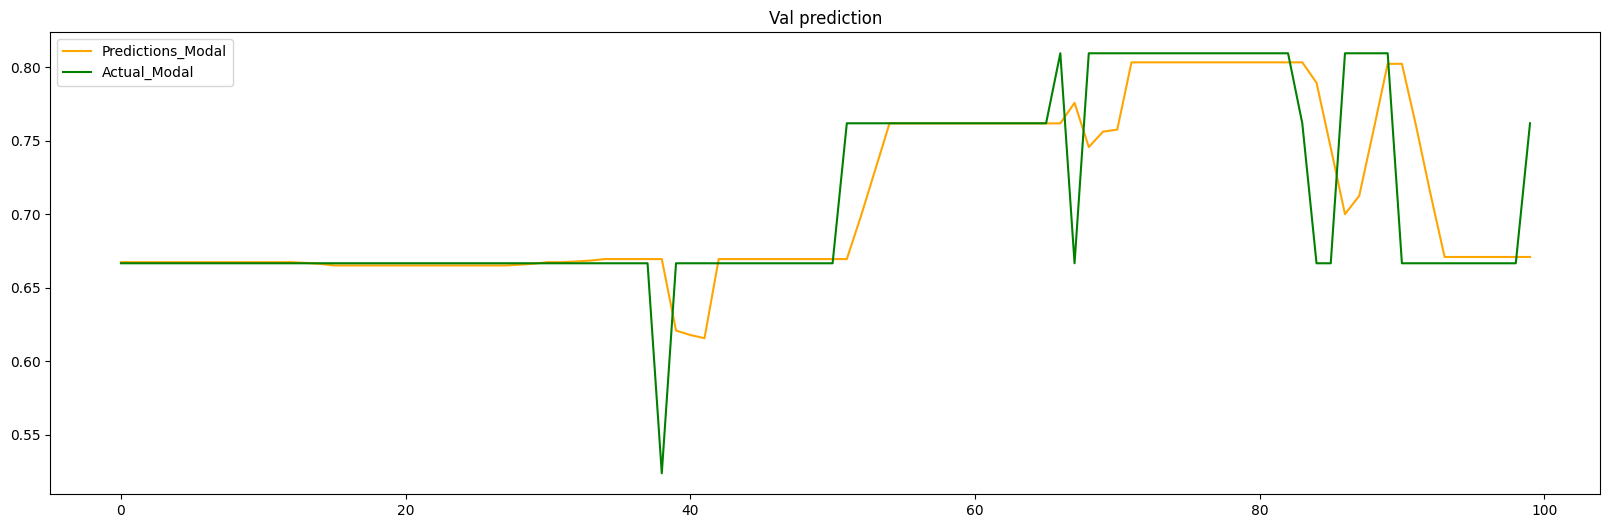

In [36]:
plot_predictions(model_gradeI, X_val_gradeI, y_val_gradeI, start=0, end=len(X_val_gradeI), tag='Val prediction')

Mean absolute error for Test prediction is 0.09116898352632635
-------------------------------------------------------------------------------------
r2 for Test prediction is 18.96177556726878
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.561997    0.568627        0.868166    0.782609          0.700380   
1        0.565508    0.568627        0.845257    0.869565          0.745398   
2        0.564420    0.490196        0.845625    0.347826          0.746644   
3        0.557179    0.882353        0.680610    0.956522          0.619926   
4        0.612190    0.568627        0.707055    0.782609          0.655356   
5        0.610389    0.568627        0.679890    0.782609          0.655249   
6        0.651652    0.568627        0.841211    0.782609          0.762380   
7        0.563461    0.568627        0.781517    0.782609          0.667108   
8        0

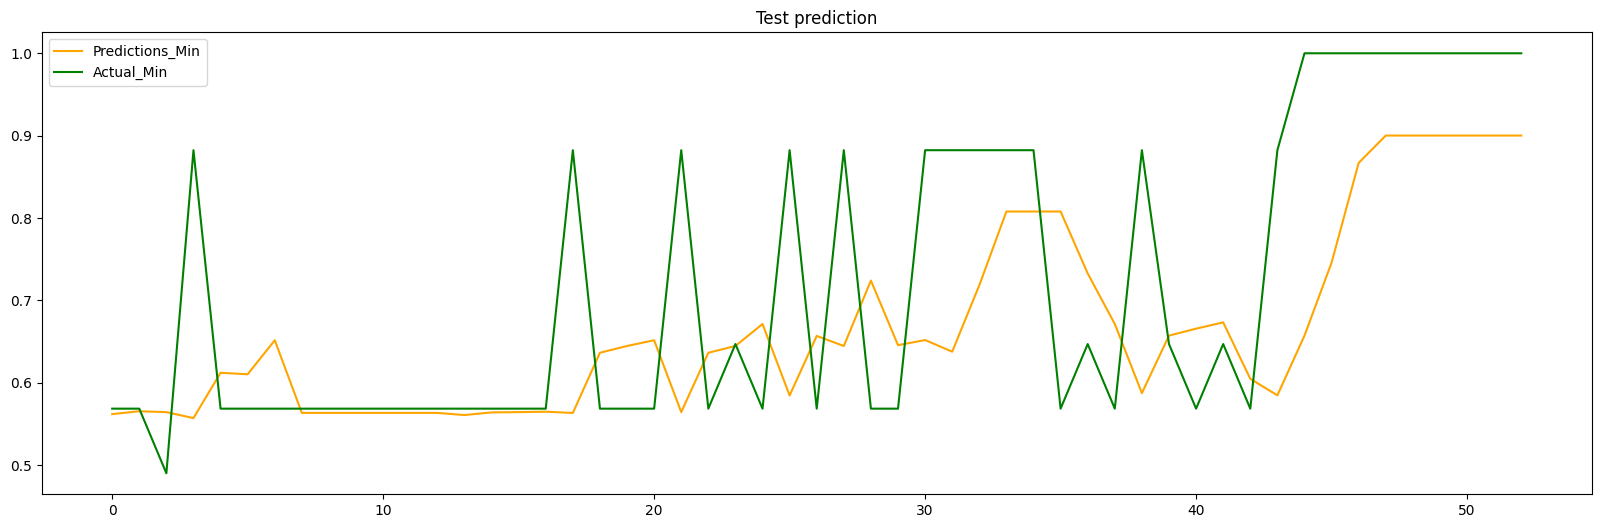

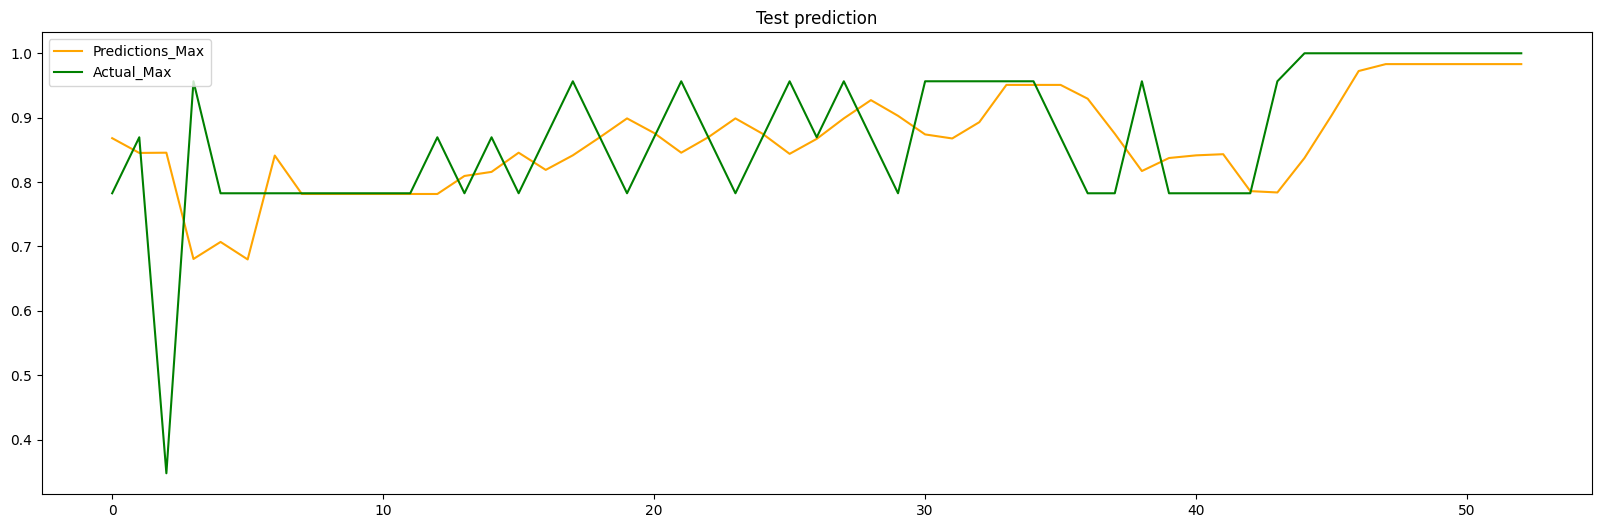

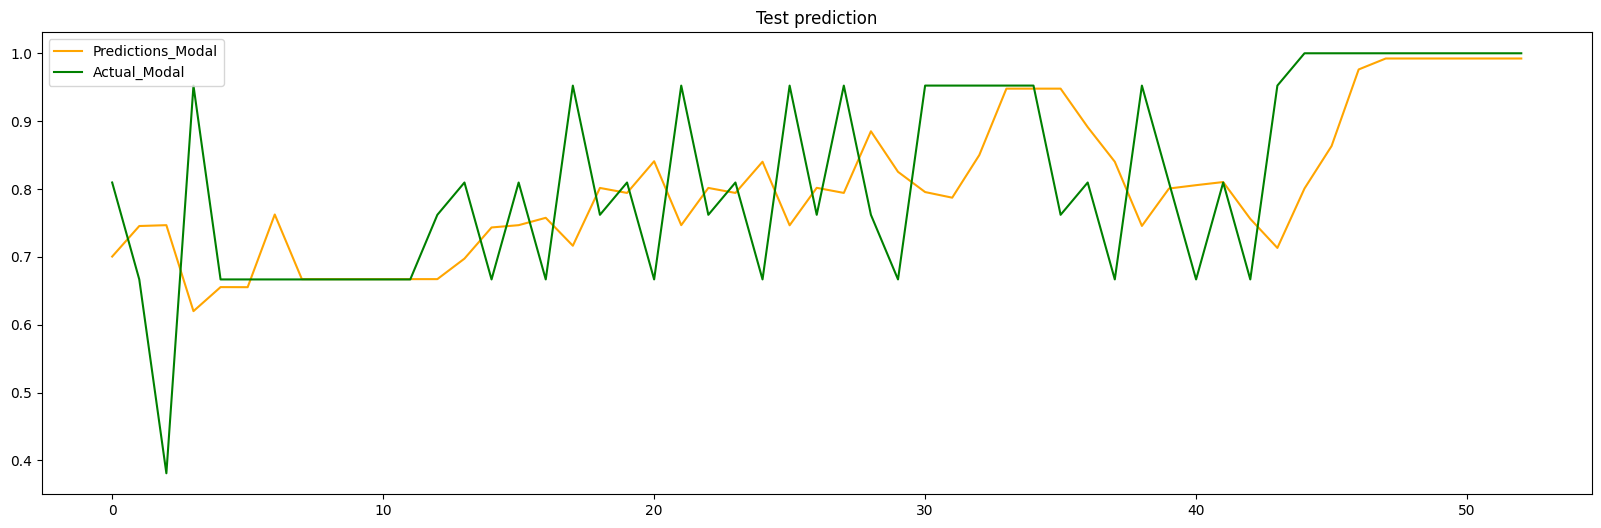

In [37]:
plot_predictions(model_gradeI, X_test_gradeI, y_test_gradeI, start=0, end=len(X_test_gradeI), tag='Test prediction')

In [34]:
# model_gradeI.save('./models/GradeI/model_gradeI.h5')

Already saved during training

In [38]:
# from tensorflow.keras.models import save_model


# model_gradeI.save('./models/GradeI/model_gradeI(3,3)91.43.keras')

In [40]:
from tensorflow.keras.models import load_model

model_gradeI = load_model('.\models\GradeI\gradeI_model.keras')

In [41]:
import joblib

scaler_gradeI = joblib.load('./Scaler Objects/scaler_grade-I.pkl')

In [43]:
recursive_prediction = []

last_batch = X_test_gradeI[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_gradeI.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [44]:
for j in recursive_prediction:
    print(j)

[[0.91578656 0.9814013  0.9911887 ]]
[[0.8936671  0.9778159  0.99101806]]
[[0.8877725 0.9772906 0.9917109]]
[[0.88617444 0.9772926  0.99215204]]
[[0.8857321  0.9773413  0.99235994]]
[[0.8856068  0.97737056 0.99244726]]
[[0.88557017 0.977384   0.9924819 ]]
[[0.88555914 0.97738945 0.99249524]]
[[0.8855559  0.97739166 0.99250025]]
[[0.88555485 0.9773926  0.99250215]]
[[0.8855545  0.97739273 0.9925029 ]]
[[0.8855544  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.8855542  0.97739285 0.9925032 ]]
[[0.

In [45]:
for k in recursive_prediction:
    k = scaler_gradeI.inverse_transform(k) 
    print(k)

[[24852.557 32572.23  28814.963]]
[[24288.512 32489.766 28811.379]]
[[24138.2   32477.682 28825.928]]
[[24097.447 32477.729 28835.193]]
[[24086.168 32478.85  28839.559]]
[[24082.975 32479.521 28841.393]]
[[24082.04  32479.832 28842.121]]
[[24081.758 32479.957 28842.4  ]]
[[24081.676 32480.008 28842.506]]
[[24081.648 32480.03  28842.547]]
[[24081.639 32480.031 28842.56 ]]
[[24081.637 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32480.035 28842.568]]
[[24081.633 32